In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
path = "F:/for learn/Python_MachineLearning/"
df = pd.read_csv(path + "housing.data", 
                 header=None, 
                 sep="\s+")
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [4]:
X = df[["LSTAT"]].values
y = df["MEDV"].values
regr = LinearRegression()

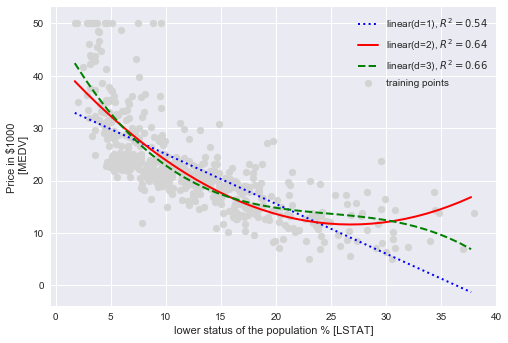

In [18]:
styles = [':', '-', '--']
colors = ['blue', 'red', 'green']
lineX = np.arange(X.min(), X.max(), 1).reshape(-1, 1)
for idx, degree in enumerate(range(1, 4)):
    if degree == 1:
        fit_X = X
        fit_lineX = lineX
    else:
        poly = PolynomialFeatures(degree=degree)
        fit_X = poly.fit_transform(X)
        fit_lineX = poly.fit_transform(lineX)
    regr.fit(fit_X, y)
    y_pred = regr.predict(fit_X)
    r2 = r2_score(y_pred=y_pred, y_true=y)
    lineY = regr.predict(fit_lineX)
    plt.plot(lineX, 
             lineY, 
             label='linear(d=%d), $R^2=%.2f$' % (degree, r2), 
             color=colors[idx], 
             linestyle=styles[idx], 
             lw=2)
plt.scatter(X, y, label='training points', c='lightgray')
plt.xlabel('lower status of the population % [LSTAT]')
plt.ylabel('''Price in $1000 \n [MEDV]''')
plt.legend(loc="upper right")
plt.show()

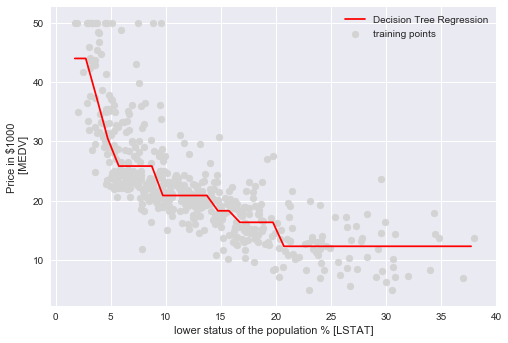

In [24]:
# 使用决策树进行回归
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
lineY = tree.predict(lineX)

plt.plot(lineX, lineY, label='Decision Tree Regression', color='red')
plt.scatter(X, y, label='training points', c='lightgray')
plt.xlabel('lower status of the population % [LSTAT]')
plt.ylabel('''Price in $1000 \n [MEDV]''')
plt.legend(loc="upper right")
plt.show()

In [32]:
# 使用随机森林进行回归
forest = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0, criterion='mse')
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
forest.fit(X_train, y_train)

tp = ['train', 'test']
method = {"mse": mean_squared_error, "r2": r2_score}
# 组合多个命令
command = np.stack(np.meshgrid(tp, list(method.keys())), axis=-1).reshape(-1, 2)
for tp, metric in command:
    y_pred = forest.predict(eval("X_" + tp))
    y_true = eval("y_" + tp)
    score = method[metric](y_pred=y_pred, y_true=y_true)
    print('%s of %s by RandomForest is: %.3f ' % (metric, tp, score))

mse of train by RandomForest is: 1.423 
mse of test by RandomForest is: 14.361 
r2 of train by RandomForest is: 0.983 
r2 of test by RandomForest is: 0.828 


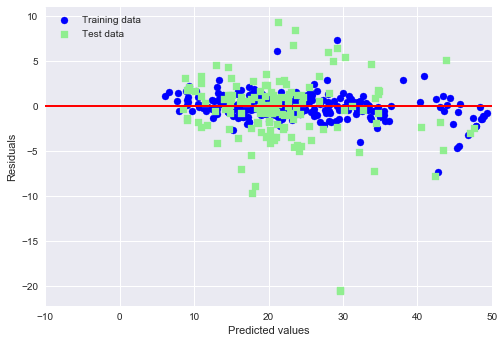

In [33]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()